In [1]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import init
import pandas as pd
import import_ipynb
import fantasy_functions as ff
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

importing Jupyter notebook from fantasy_functions.ipynb


/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
fantasy_functions.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [
/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

## Load Initial Play-By-Play Data

In [3]:
filepath = '~/Desktop/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_2019_4.csv'

In [4]:
initial_df = pd.read_csv(filepath)

/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
initial_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [6]:
remove_no_plays_df = initial_df[initial_df.play_type != 'no_play']

## Get WRs List- This will come into play as we evaluate the plays

In [7]:
roster_filepath = '~/Desktop/nflscrapR-data/roster_data/regular_season/reg_roster_2019.csv'

In [8]:
wr_names_df = ff.player_names(roster_filepath, 'WR')

In [9]:
wr_names_df.head()

,abbr_player_name,gsis_id
0,A.Brown,00-0035676
1,A.Humphries,00-0032009
2,A.Thielen,00-0030035
3,A.Wilson,00-0030669
4,A.Erickson,00-0032543


## Filter to plays that only involve the Quartewracks in the List

In [10]:
quartewrack_plays = ff.filter_position(wr_names_df, remove_no_plays_df)

In [11]:
quartewrack_plays.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

## WR Stacked Bar

In [12]:
from fantasy_functions import players_summary

In [16]:
summary_dict = players_summary(quartewrack_plays, wr_names_df)

Generating passing stats for A.Brown.
Generating passing stats for A.Humphries.
Generating passing stats for A.Thielen.
Generating passing stats for A.Wilson.
Generating passing stats for A.Erickson.
Generating passing stats for A.Hurns.
Generating passing stats for A.Robinson.
Generating passing stats for A.Jeffery.
Generating passing stats for A.Cooper.
Generating passing stats for A.Miller.
Generating passing stats for A.Brown.
Generating passing stats for A.Tate.
Generating passing stats for B.Fowler.
Generating passing stats for B.Wilson.
Generating passing stats for B.Cooks.
Generating passing stats for B.Perriman.
Generating passing stats for C.Ridley.
Generating passing stats for C.Beebe.
Generating passing stats for C.Rogers.
Generating passing stats for C.Conley.
Generating passing stats for C.Godwin.
Generating passing stats for C.Hogan.
Generating passing stats for C.Kirk.
Generating passing stats for C.Core.
Generating passing stats for C.Latimer.
Generating passing stats 

Generating rushing stats for J.Meyers.
Generating rushing stats for J.Washington.
Generating rushing stats for J.Crowder.
Generating rushing stats for J.Wright.
Generating rushing stats for J.Landry.
Generating rushing stats for J.Wims.
Generating rushing stats for J.Brown.
Generating rushing stats for J.Ross.
Generating rushing stats for J.Holton.
Generating rushing stats for J.Bellamy.
Generating rushing stats for J.Gordon.
Generating rushing stats for J.Reynolds.
Generating rushing stats for J.Smith-Schuster.
Generating rushing stats for J.Edelman.
Generating rushing stats for J.Jones.
Generating rushing stats for J.Hardy.
Generating rushing stats for K.Allen.
Generating rushing stats for K.Johnson.
Generating rushing stats for K.Coutee.
Generating rushing stats for K.Harmon.
Generating rushing stats for K.Bourne.
Generating rushing stats for K.Golladay.
Generating rushing stats for K.Stills.
Generating rushing stats for L.Fitzgerald.
Generating rushing stats for M.Hollins.
Generati

Generating receiving stats for S.Diggs.
Generating receiving stats for S.Shepard.
Generating receiving stats for S.Sims.
Generating receiving stats for T.Jones.
Generating receiving stats for T.Hilton.
Generating receiving stats for T.Sharpe.
Generating receiving stats for T.Austin.
Generating receiving stats for T.Gabriel.
Generating receiving stats for T.Taylor.
Generating receiving stats for T.Ginn.
Generating receiving stats for T.McLaurin.
Generating receiving stats for T.Benjamin.
Generating receiving stats for T.Smith.
Generating receiving stats for T.Davis.
Generating receiving stats for T.Quinn.
Generating receiving stats for T.Boyd.
Generating receiving stats for T.Lockett.
Generating receiving stats for T.Hill.
Generating receiving stats for T.Williams.
Generating receiving stats for W.Fuller.
Generating receiving stats for W.Snead.
Generating receiving stats for Z.Jones.
M.Thomas
J.Jones
C.Godwin
D.Hopkins
K.Allen
A.Robinson
C.Kupp
D.Parker
K.Golladay
J.Edelman
A.Cooper
D.M

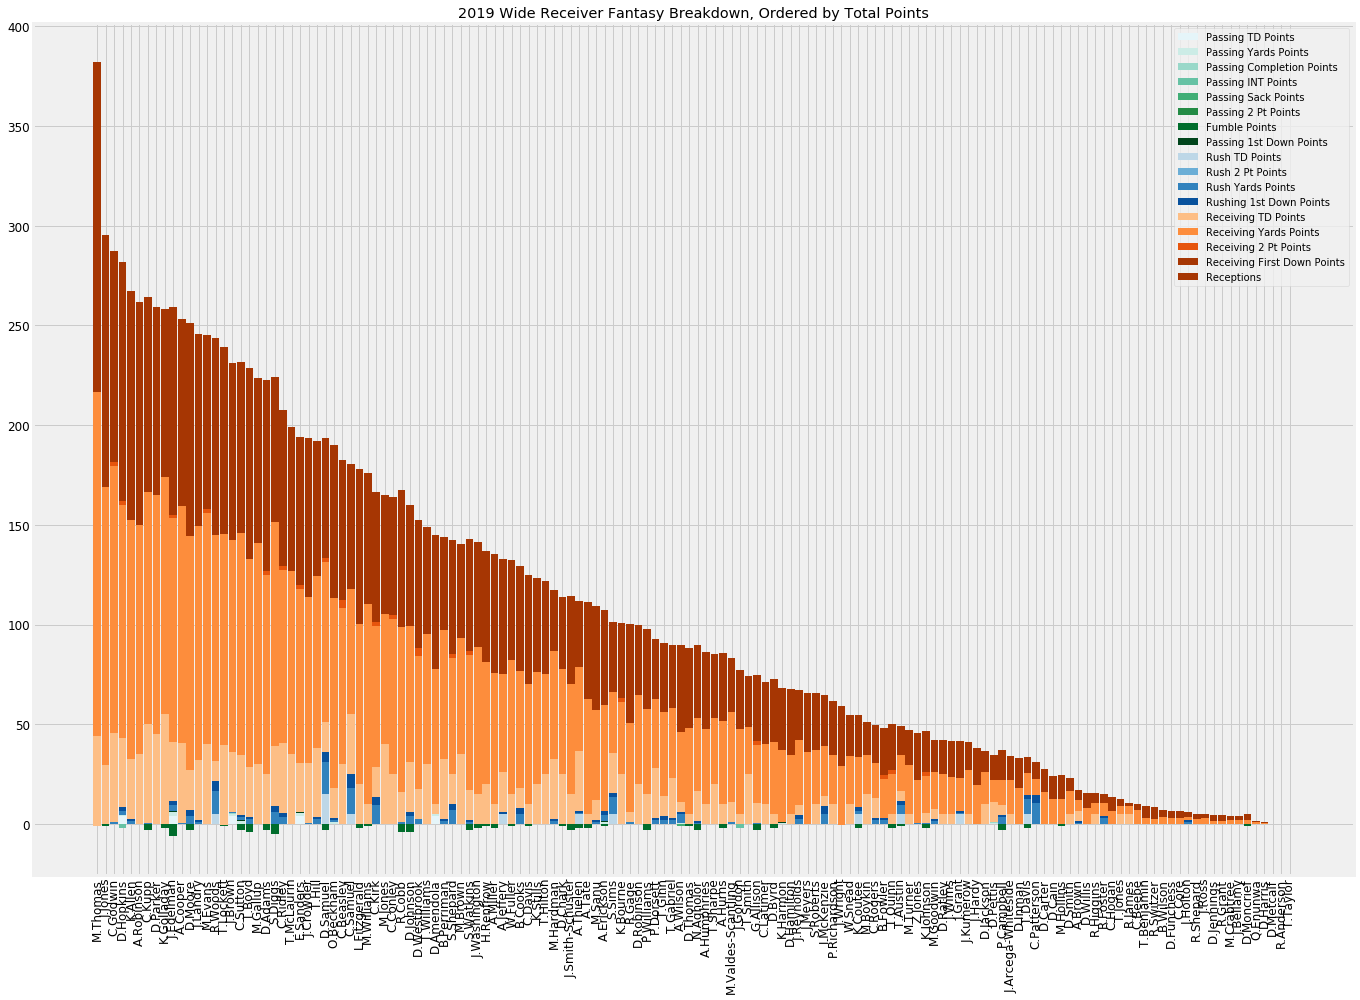

In [17]:
filepath = 'figures/2019/wr_fantasy_breakdown.png'
ff.stack_players(summary_dict, filepath, 'Wide Receiver', 90)